# Physics 256
## Air Resistance

<img src="data/bicycle.png" width=600px>

## Last Time

- radioactive decay
- discrete approximation to the derivative
- numerical solutions of ordinary differential equations with Euler's Method

## Today

- bicycle motion


## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'

## Bicycle  Motion

Consider the motion of a bicycle without friction.  The starting point is Newton's second law

\begin{equation}
\frac{dv}{dt} = \frac{F}{m}
\end{equation}
where $m$ is the mass of the complete bicycle + rider system.  In principle the details of the total force are quite complicated, but we can measure the average power generated by a rider.  Elite cyclists can maintain a power output of approximately 400 W over extended periods on flat roads. Power is the rate of change of energy:

\begin{align}
P &= \frac{dE}{dt} \quad \mathrm{and}\quad E = \frac{1}{2} m v^2 \\
&= \frac{1}{2} m \frac{d}{dt} (v^2) \\
&= m v \frac{d v}{dt} . 
\end{align}

Assuming $P$ is constant, we can solve by integrating:
\begin{align}
\int_{v_0}^v v dv &= \frac{P}{m}\int_0^t dt \\
\frac{1}{2} \left. v^2\right \rvert_{v_0}^v &= \frac{P}{m} t \\
v(t) &= \sqrt{v_0^2 + 2 \frac{P}{m} t} 
\end{align}


which can be written this as:
\begin{equation}
\frac{v(t)}{v_0} = \sqrt{1 + \frac{2 P}{m v_0^2} t}.
\end{equation}

### Plotting the motion

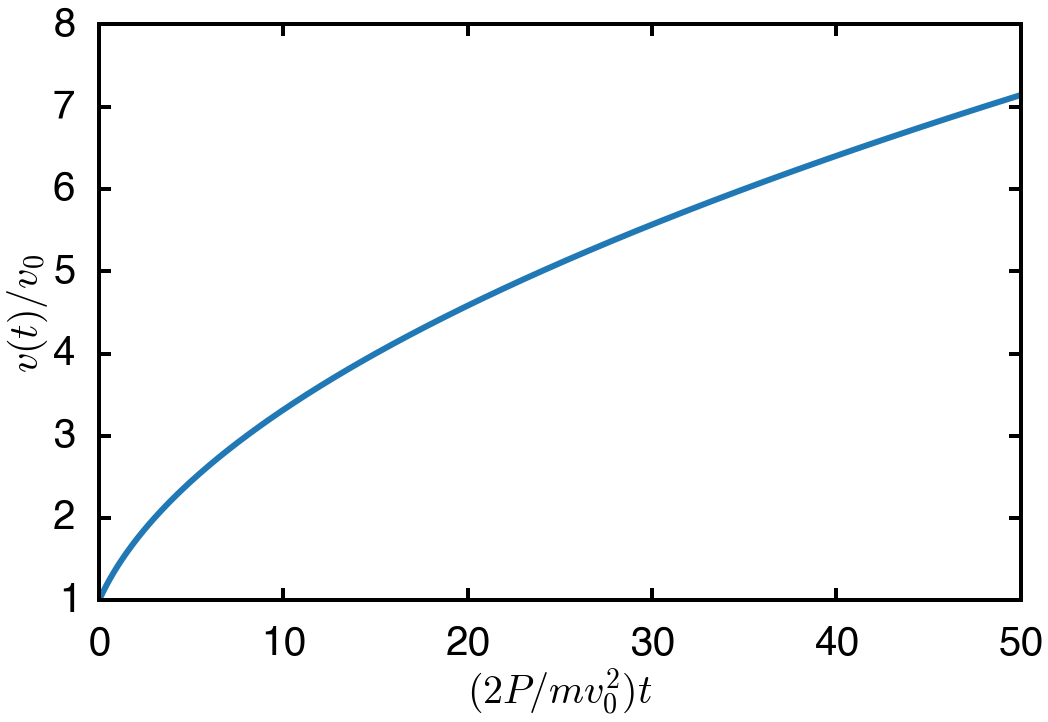

In [2]:
t = np.arange(0,50,0.1)
plt.plot(t,np.sqrt(1+t))
plt.ylabel(r'$v(t)/v_0$')
plt.xlabel(r'$(2P/m v_0^2) t$')

Obviously we have a big problem here, the model predicts that the velocity increaes without bound.  We have neglected the important effects of air resistance

## Air Resistance

For a well tuned road bike, the energy lost to friction in the hubs and tires is negligible compared to wind resistance.  The physics of air resistance is quite complicated, but in general the **drag force** can be written as the sum of two terms:

\begin{equation}
F_{\rm drag} \approx -B_1 v - B_2 v^2 .
\end{equation}

### Viscous Drag
The first term dominates at low velocities and is generally proportional to viscosity $\eta$ and the linear size of the body.  For a sphere of radius $R$, $B_1 = 6\pi \eta R$.

### Inertial Drag
This is the term that we will be most concerned with in this course.  It is very difficult to calculate in general and usually requres the use of wind-tunnel experiments or computer simulations.  However, we can make a rought *back of the envelope* calculation.

This type of drag arise from the fact that an object moving through a dense medium has to *push* material out if its way.  Consider an object moving through the atmosphere (density $\rho$) with velocity $v$ with a cross sectional area $A$.  In a time $\Delta t$ the mass that must be moved out of the way is:

\begin{equation}
m = \rho A v \Delta t
\end{equation}

and this *chunk* of atmosphere has now been given a velocity $v$  so its kinetic energy is

\begin{equation}
E = \frac{1}{2} m v^2.
\end{equation}

This must be equal to the work performed on the *air mover* due to air resistance in the time $\Delta t$ and $W = F \times d = \Delta KE$ so
\begin{equation}
F_{\rm drag} v \Delta t = -E.
\end{equation}

Putting this together:
\begin{align}
F_{\rm drag} v \Delta t &= -\frac{1}{2} \rho A v \Delta t v^2  \\
F_{\rm drag} &= -\frac{1}{2} C \rho A v^2
\end{align}
where we have introduced the *drag coefficient* $C$ which is equal to unity in our simple model.  In general it needs to be measured or computed.  

### Updating our Bicycle Model

We can modify our equation of motion for the bicycle to include the effects of air resistance. Neglecting the unimportant linear term we have:

\begin{equation}
\frac{dv}{dt} = \frac{P}{m v} - \frac{1}{2m} C \rho A v^2 
\end{equation}

**This resonably simple first order ordinary differential equation has no solution in terms of known functions.**

However, we know how to solve this on a computer using the Euler Method.  Last time we learned how to discretize the continuous derivative:

\begin{equation}
\frac{dv}{dt} = \frac{v(t+\Delta t) - v(t)}{\Delta t} + O(\Delta t) .
\end{equation}

Switching to our subscript notation for indices, our equation of motion can be written as:

\begin{align}
v_{n+1} = v_n + \frac{P \Delta t} { m v_n} - \frac{1}{2m} C \rho A v_n^2 \Delta t.
\end{align}

Consider the set of physical parameters:

\begin{align}
    m &= 70~{\rm kg} \\
    A &= 0.33~\mathrm{m}^2 \\
    \rho &= 1.2~\mathrm{kg}/\mathrm{m}^3 \\
    P &= 400~\mathrm{W} \\
    C &= 0.5
\end{align}

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
For an initial velocity of $v_0 = 4~\mathrm{m/s}$ compute the updated bicycle trajectory and compare with the $C=0$ case.
</div>


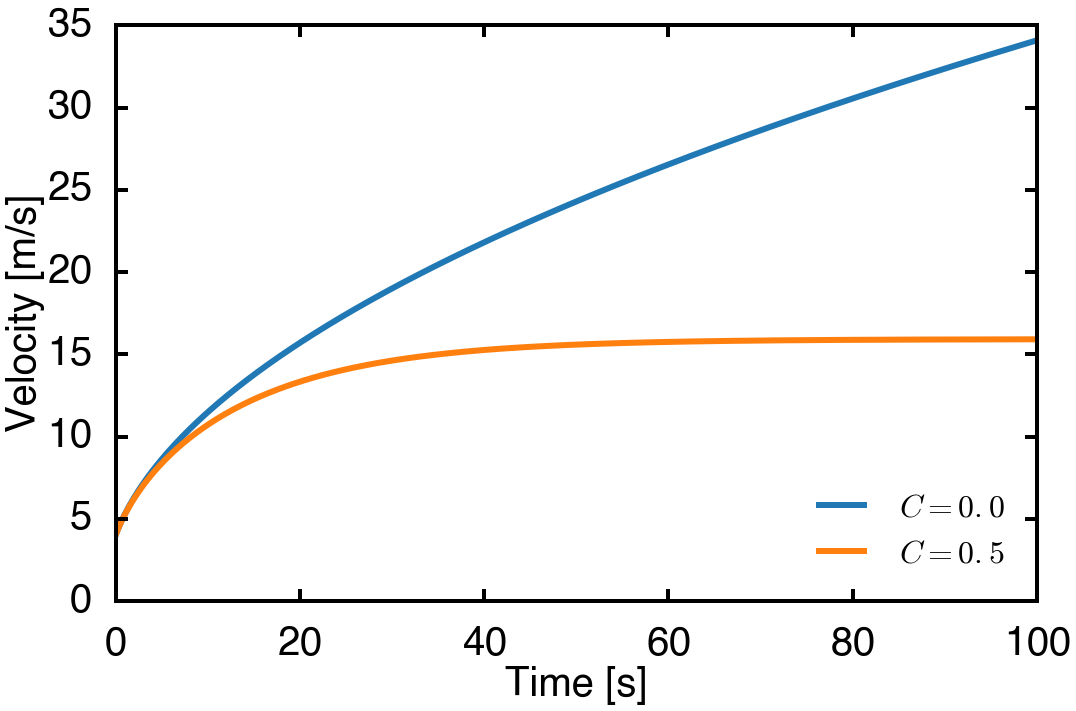

In [10]:
%run ../../Examples/Simple_ODEs/bicycle.py

In [ ]:
# %load ../../Examples/Simple_ODEs/bicycle.py
# filename: bicycle.py
# author: Adrian Del Maestro
# date: 09.19.2012

# Wind resistance for a bicycle

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('notebook')

# main program
def main():

    # initialize all variables 
    dt = 0.25 # s
    m = 70 # kg
    A = 0.33 # m^2
    rho = 1.2 # kg/m^3
    P = 400 # W

    # the time array
    t = np.arange(0,100.0,dt)
    numSteps = t.size

    # the velocity array
    v = np.zeros_like(t)

    # the initial velocity
    v[0] = 4.0 # m/s

    # perform the numerical integration, both with and without wind resistance
    for C in [0.0,0.5]:
        for n in range(1,numSteps):
            v[n] = v[n-1] + P/(m*v[n-1])*dt - C*rho*A*v[n-1]**2*dt/(2.0*m)

        # plot the result
        plt.plot(t,v,'-', label=r'$C = %3.1f$' % C)

    # set the plot labels
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s]')

    # draw the legend
    plt.legend(loc='lower right')

    # draw the graph to the screen
    plt.show()


if __name__ == '__main__':
    main()


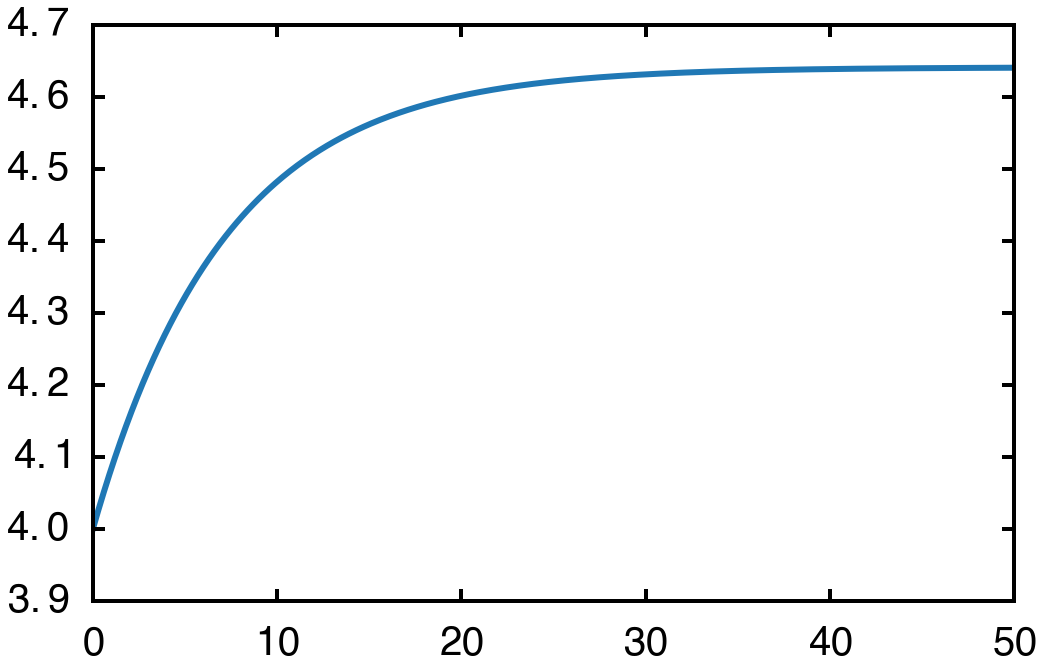

In [5]:
from scipy.integrate import odeint
t = np.arange(0,50,0.1)
v = odeint(lambda v,t: 1.0/v - 0.01*v**2,4,t)
plt.plot(t,v)